<a href="https://colab.research.google.com/github/RonySherif/AI-Assisted-Patient-Intake-System/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("diabetes.csv")


print(" Data Loaded Successfully!")
print(df.head())

df = df.dropna()


X = df.drop('Outcome', axis=1)
y = df['Outcome']




y = y.replace({'Low': 0, 'High': 1})


X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Class Imbalance Ratio: {ratio:.2f}")

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=ratio,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("\n Training XGBoost model...")
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n XGBoost Accuracy: {acc * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



 Data Loaded Successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Class Imbalance Ratio: 1.88

 Training XGBoost model...

 XGBoost Accuracy: 69.48%

Confusion Matrix:
[[70 29]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        99
           1       0.5

Training Logistic Regression...
Logistic Regression Accuracy: 75.32%

Training Decision Tree...
Decision Tree Accuracy: 74.68%

Training Random Forest...
Random Forest Accuracy: 73.38%


 Model Comparison Results:
                 Model  Accuracy
0  Logistic Regression  0.753247
1        Decision Tree  0.746753
2        Random Forest  0.733766


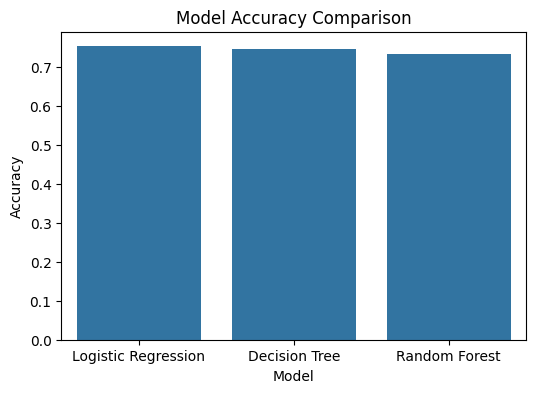

In [5]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),

}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc*100:.2f}%\n")



results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\n Model Comparison Results:")
print(results_df)

plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()


In [6]:

!pip install xgboost --quiet

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n XGBoost Accuracy: {acc * 100:.2f}%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training XGBoost model...

 XGBoost Accuracy: 70.13%

Confusion Matrix:
[[71 28]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154



In [7]:

!pip install imbalanced-learn --quiet
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, f1_score

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

xgb_model_balanced = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

print("\n Training XGBoost model after SMOTE balancing...")
xgb_model_balanced.fit(X_train_res, y_train_res)
y_pred_balanced = xgb_model_balanced.predict(X_test_res)

acc_before = accuracy_score(y_test, y_pred)
recall_before = recall_score(y_test, y_pred)
f1_before = f1_score(y_test, y_pred)

acc_after = accuracy_score(y_test_res, y_pred_balanced)
recall_after = recall_score(y_test_res, y_pred_balanced)
f1_after = f1_score(y_test_res, y_pred_balanced)

comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "F1 Score"],
    "Before SMOTE": [acc_before, recall_before, f1_before],
    "After SMOTE": [acc_after, recall_after, f1_after]
})
print("\n Comparison Before vs After SMOTE:")
print(comparison)



 Training XGBoost model after SMOTE balancing...

 Comparison Before vs After SMOTE:
     Metric  Before SMOTE  After SMOTE
0  Accuracy      0.701299     0.785000
1    Recall      0.672727     0.821782
2  F1 Score      0.616667     0.794258
